# [**Housing Price Regression**](https://www.kaggle.com/datasets/prokshitha/home-value-insights 'Kaggle: Housing Price Regression')

## **About the Dataset**

#### **Home Value Insights: A Beginner's Regression Dataset**

This dataset is designed for beginners to practice regression problems, particularly in the context of predicting house prices. It contains 1000 rows, with each row representing a house and various attributes that influence its price. The dataset is well-suited for learning basics to intermediate-level regression modeling techniques.

##### **Features**:

1. `Square_Footage`: The size of the house in square feet. Larger homes typically have higher price.
   
2. `Num_Bedrooms`: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
   
3. `Num_Bathrooms`: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
   
4. `Year_Built`: The year the house was built. Older houses may be priced lower due to wear and tear.
   
5. `Lot_Size`: The size of the lot of the house is built on, measured in acres. Larger lots tend to add value to a property.
   
6. `Garage_Size`: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
   
7. `Neighborhood_Quality`: A rating of the neighborhood's quality on a scale of 1-10, where 10 indicates a higher-quality neighborhood. Better neighborhoods usually command higher prices.
   
8. `House_Price` (Target Variable): The price of the house, which is the dependent variable you aim to predict.

## **Import Required Libraries & Setup**

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import prettytable
import csv, sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

prettytable.DEFAULT = 'DEFAULT'

In [2]:
# Set up the database connection
con = sqlite3.connect('housing_price_data.db')
cur = con.cursor()

In [3]:
%load_ext sql

%sql sqlite:///housing_price_data.db

In [4]:
df = pd.read_csv('house_price_regression_dataset.csv')
df.to_sql('housing_prices_TBL', con, if_exists='replace', index=False)

1000

In [5]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [6]:
# Drop the table if it exists

%sql DROP TABLE IF EXISTS housing_prices_table;

 * sqlite:///housing_price_data.db
Done.


[]

In [7]:
%sql CREATE TABLE housing_prices_table AS SELECT * FROM housing_prices_TBL;

 * sqlite:///housing_price_data.db
Done.


[]

## **Queries in SQL**

With this housing price dataset, we can explore and analyze housing prices using SQL.

#### **Descriptive Statistics**

##### **Average, Min, Max House Price**

Calculates average, minimum, and maximum house prices.

In [8]:
%%sql

-- Query to calculate the average, minimum and maximum house price

SELECT 
    ROUND(AVG(House_Price), 2) AS average_price,
    ROUND(MIN(House_Price), 2) AS min_price,
    ROUND(MAX(House_Price), 2) AS max_price
FROM housing_prices_table;

 * sqlite:///housing_price_data.db
Done.


average_price,min_price,max_price
618861.02,111626.85,1108236.84


Returns the mean, lowest, and highest house prices in the dataset. 

*Result*: Gives a sense of the price range and central tendency.

##### **Average Square Footage, Bedrooms, Bathrooms, Lot Size, and Garage Size**

Computes average values for square footage, bedrooms, bathrooms, lot size, and garage size.

In [9]:
%%sql

-- Average square footage, bedrooms, and bathrooms, etc.

SELECT
    AVG(Square_Footage) AS avg_square_feet,
    AVG(Num_Bedrooms) AS avg_bedrooms,
    AVG(Num_Bathrooms) AS avg_bathrooms,
    AVG(Lot_Size) AS avg_lot_size,
    AVG(Garage_Size) AS avg_garage_size
FROM housing_prices_table;

 * sqlite:///housing_price_data.db
Done.


avg_square_feet,avg_bedrooms,avg_bathrooms,avg_lot_size,avg_garage_size
2815.422,2.99,1.973,2.7780874273930207,1.022


Shows the average values for key features. 

*Result*: Helps understand the typical house profile in the dataset.

#### **Trends and Grouping**

Finds average house price grouped by number of bedrooms, neighborhood quality, and year built.

##### **Average Price by Number of Bedrooms**

In [10]:
%%sql

-- Average house price by number of bedrooms

SELECT Num_Bedrooms,
    ROUND(AVG(House_Price), 2) AS avg_price
FROM housing_prices_table
GROUP BY Num_Bedrooms
ORDER BY Num_Bedrooms;

 * sqlite:///housing_price_data.db
Done.


Num_Bedrooms,avg_price
1,610105.13
2,601324.7
3,653491.48
4,621162.81
5,612880.76


Groups houses by bedroom count and shows average price for each group.

*Result*: Reveals how adding bedrooms affects price. 

##### **Average Price by Neighborhood Quality**

In [11]:
%%sql

-- Average house price by neighborhood quality
SELECT Neighborhood_Quality,
    ROUND(AVG(House_Price), 2) AS avg_price
FROM housing_prices_table
GROUP BY Neighborhood_Quality
ORDER BY Neighborhood_Quality;

 * sqlite:///housing_price_data.db
Done.


Neighborhood_Quality,avg_price
1,632968.7
2,613066.05
3,625680.91
4,629867.22
5,595239.56
6,593803.86
7,648856.34
8,630746.11
9,617873.06
10,607767.06


Groups by neighborhood quality rating and shows average price.

*Result*: Higher neighborhood quality is generally associated with higher prices.

##### **Average Price by Year Built**

In [12]:
%%sql 

-- Average house price by year built
SELECT Year_Built,
    ROUND(AVG(House_Price), 2) AS avg_price
FROM housing_prices_table
GROUP BY Year_Built
ORDER BY Year_Built
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Year_Built,avg_price
1950,636577.29
1951,709195.03
1952,742316.21
1953,504927.49
1954,467964.66
1955,758762.54
1956,590510.23
1957,456029.83
1958,677483.56
1959,532012.24


Groups by year built and shows average price for each year.

*Result*: Can reveal trends over time, such as newer homes being more expensive.

#### **Correlation and Relationships**

##### **Square Footage vs. Price**

Shows the relationship between square footage and price.

In [13]:
%%sql

-- Relationship between square footage and price (simple correlation)
SELECT Square_Footage,
    ROUND(House_Price, 2) AS House_Price
FROM housing_prices_table
ORDER BY Square_Footage
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,House_Price
503,206042.35
504,149743.5
505,159121.47
509,179398.43
509,140538.08
516,171023.96
534,187508.59
554,120795.55
555,111626.85
564,242865.93


Lists square footage and corresponding price for a sample of houses.

*Result*: Shows that larger homes tend to be more expensive.

##### **Lot Size Grouping**

Groups houses by lot size (small, medium, large) and computes average price for each group.

In [14]:
%%sql

-- Impact of lot size on price (grouped by lot size ranges)
SELECT
    CASE
        WHEN Lot_Size < 1 THEN 'Small'
        WHEN Lot_Size BETWEEN 1 AND 3 THEN 'Medium'
        ELSE 'Large'
    END AS Lot_Size_Group,
    ROUND(AVG(House_Price), 2) AS avg_price
FROM housing_prices_table
GROUP BY Lot_Size_Group;

 * sqlite:///housing_price_data.db
Done.


Lot_Size_Group,avg_price
Large,653657.43
Medium,591514.47
Small,581094.58


Categorizes lot size as Small, Medium, or Large and shows average price for each. 

*Result*: Larger lots generally command higher prices.

#### **Filtering and Segmentation**

##### **Houses Built After 2010**

Retrieves houses built after 2010.

In [15]:
%%sql

-- House built after 2010
SELECT *
FROM housing_prices_table
WHERE Year_Built > 2010
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
4272,3,3,2016,4.75301384940204,1,6,985260.854490162
3592,1,2,2016,3.634822720478255,0,9,777977.3901185812
3671,1,2,2012,4.911960066216673,0,1,814427.8614089885
3058,2,1,2017,1.498552073529678,0,2,672852.0519810001
1475,2,3,2014,3.790924338664833,1,5,370167.09090271546
2306,1,2,2014,3.637739385742356,2,5,530824.1967752124
2935,4,2,2013,0.5601545746672804,1,9,656980.4604282172
1100,5,3,2018,2.343826563993226,0,1,318266.2771320871
3324,1,1,2014,0.688934430093147,2,8,697574.5556670319
3056,2,3,2018,4.315675476935068,2,3,735678.4622017285


Filters for newer homes.

*Result*: Lets you analyze recent construction trends and prices.

##### **Houses with >3 Bedrooms and >2 Bathrooms**

Selects houses with more than 3 bedrooms and more than 2 bathrooms.

In [16]:
%%sql

-- Houses with more than 3 bedrooms and 2 bathrooms
SELECT *
FROM housing_prices_table
WHERE Num_Bedrooms > 3 AND Num_Bathrooms > 2
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
3944,5,3,1990,2.475930043628728,2,8,879796.9835223783
2933,5,3,1973,4.781489129265565,2,9,701133.8041471172
1684,5,3,1988,3.994201861929581,1,8,440726.2848162878
1767,5,3,2009,1.073238872001527,1,1,432357.9061027443
1100,5,3,2018,2.343826563993226,0,1,318266.2771320871
4514,4,3,2008,4.917683041345137,0,4,1046315.8960136625
4443,4,3,1976,4.741456728546074,1,1,981190.782911222
564,5,3,2018,2.844829357287745,2,4,242865.9315016322
4340,5,3,1962,1.881070309375565,0,10,903251.9405609448
2538,5,3,1968,0.784131318173261,0,2,551463.8888534079


Filters for larger homes.

*Result*: Useful for targeting family-sized homes.

##### **Top 10% of Prices**

Identifies houses in the top 10% of prices using a percentile calculation.

In [17]:
%%sql

-- Houses in the top 10% of prices

WITH ordered_prices AS (
    SELECT House_Price
    FROM housing_prices_table
    ORDER BY House_Price
),
percentile_row AS (
    SELECT 
        House_Price as percentile_value
    FROM ordered_prices
    LIMIT 1 OFFSET (
        (SELECT COUNT(*) FROM housing_prices_table) * 9 / 10
    )
)
SELECT *
FROM housing_prices_table
WHERE House_Price >= (SELECT percentile_value FROM percentile_row)
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
4272,3,3,2016,4.75301384940204,1,6,985260.854490162
4926,2,1,1993,4.699072554837388,0,8,1041740.8589249004
4617,5,1,2005,4.3578900606237845,0,4,1019192.6613592046
4514,4,3,2008,4.917683041345137,0,4,1046315.8960136625
4443,4,3,1976,4.741456728546074,1,1,981190.782911222
4797,1,2,1979,2.162668703141211,2,1,986006.861736761
4384,3,2,2017,2.9661456049890806,2,7,985223.9966541852
4974,5,2,2000,3.709561406375016,2,10,1107045.062935083
4993,3,2,1966,2.237953967676638,1,3,1020324.7565966452
4988,4,2,1968,1.3341775058713017,2,4,1026397.296612232


Finds houses in the top price decile.

*Result*: Identifies luxury or premium properties.

#### **Outlier Detection**

##### **Lot Size > 4**

Lists houses with a lot size greater than 4 acres.

In [23]:
%%sql

-- Houses with a lot size greater than 4 (example threshold)

SELECT * 
FROM housing_prices_table
WHERE Lot_Size > 4
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
4272,3,3,2016,4.75301384940204,1,6,985260.854490162
4926,2,1,1993,4.699072554837388,0,8,1041740.8589249004
3671,1,2,2012,4.911960066216673,0,1,814427.8614089885
2933,5,3,1973,4.781489129265565,2,9,701133.8041471172
4617,5,1,2005,4.3578900606237845,0,4,1019192.6613592046
1582,5,2,1956,4.48528893908798,1,5,396246.3588887452
3247,1,2,2005,4.467035547233406,1,10,740174.0146550778
3505,2,3,1968,4.433768069706617,1,8,745670.6371477235
4390,1,1,1960,4.19269440954464,2,5,912468.0479046734
3056,2,3,2018,4.315675476935068,2,3,735678.4622017285


Finds houses with unusually large lots.

*Result*: These may be outliers or special properties.

#### **Aggregations**

##### **Count by Neighborhood Quality**

Counts the number of houses per neighborhood quality.

In [24]:
%%sql

-- Total number of houses per neighborhood quality
SELECT Neighborhood_Quality,
    COUNT(*) AS house_count
FROM housing_prices_table
GROUP BY Neighborhood_Quality
ORDER BY Neighborhood_Quality;

 * sqlite:///housing_price_data.db
Done.


Neighborhood_Quality,house_count
1,91
2,105
3,85
4,99
5,109
6,101
7,102
8,97
9,88
10,123


Counts how many houses are in each neighborhood quality group.

*Result*: Shows the distribution of neighborhood ratings.

##### **Sum of Prices by Year Built**

Sums house prices by year built.

In [28]:
%%sql 

-- Sum of house prices by year built
SELECT Year_Built,
    ROUND(SUM(House_Price),2) AS total_price
FROM housing_prices_table
GROUP BY Year_Built
ORDER BY Year_Built
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Year_Built,total_price
1950,7638927.42
1951,4255170.18
1952,7423162.13
1953,6564057.4
1954,5615575.87
1955,12898963.1
1956,7086122.8
1957,6840447.52
1958,8129802.67
1959,8512195.8


Sums total houses prices for each year built.

*Result*: Indicates which years contributed most to total market value.

#### **Top/Bottom Listings**

Displays the top 10 most expensive and bottom 10 least expensive houses.

##### **Top 10 Most Expensive Houses**

In [29]:
%%sql

-- Top 10 most expensive houses
SELECT *
FROM housing_prices_table
ORDER BY House_Price DESC
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
4922,4,1,2018,4.23375289844731,2,2,1108236.8362913695
4974,5,2,2000,3.709561406375016,2,10,1107045.062935083
4996,1,3,2014,4.252063779134723,1,1,1102533.6490590929
4952,4,3,1995,4.725027320185737,2,9,1099211.6405116057
4933,3,1,2015,4.7693497781737,2,7,1096158.2899088082
4995,3,2,2007,3.6800399015496494,0,2,1092026.89678641
4965,5,2,1977,3.0314984057287133,2,2,1075864.2810329462
4880,3,1,2008,4.66035110929355,1,5,1075814.4318808403
4996,5,1,2003,1.8681362260159984,0,8,1070454.2752476104
4992,4,2,1960,4.25779675454759,1,10,1068538.1056038716


Lists the highest-priced homes.

*Result*: Useful for luxury market analysis.

##### **Bottom 10 Least Expensive Houses**

In [30]:
%%sql

-- Bottom 10 least expensive houses
SELECT *
FROM housing_prices_table
ORDER BY House_Price ASC
LIMIT 10;

 * sqlite:///housing_price_data.db
Done.


Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
555,2,1,1962,1.5525361916249156,0,2,111626.85342361582
626,2,1,1959,1.178093691503752,2,1,113576.5123703764
554,3,2,1954,1.5464359922938475,2,6,120795.5523667112
627,2,1,1967,2.637279343686867,0,2,126097.92716348889
509,5,3,1957,1.4386476548347282,1,1,140538.08318538152
749,1,3,1985,0.5754033702157209,1,7,146020.40342022013
646,1,1,1956,2.3105072985679973,2,4,146406.89625235138
617,1,1,1982,2.3472310732724955,0,5,147206.86576297088
661,4,1,1964,2.1851617998560764,0,3,147601.55157708153
504,3,1,1961,4.962977964406623,0,10,149743.4999535613


Lists the lowest-priced homes.

*Result*: Useful for affordable housing analysis.

## **Exploratory Data Analysis**

##### **Data Overview**

Checks the shape, info, and summary statistics of the DataFrame.

In [32]:
# Check the shape of the DataFrame
df.shape

(1000, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [34]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


*Result*: Confirms data is loaded correctly and gives a quick overview.

Examines data types, missing values, and duplicate rows.

In [39]:
df.dtypes

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

In [35]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [36]:
df.duplicated().sum()

0

*Result*: Ensures data quality; in which there are no missing or duplicate values.

#### **Numerical Features**

Plots histograms for all numerical features to visualize their distribution.

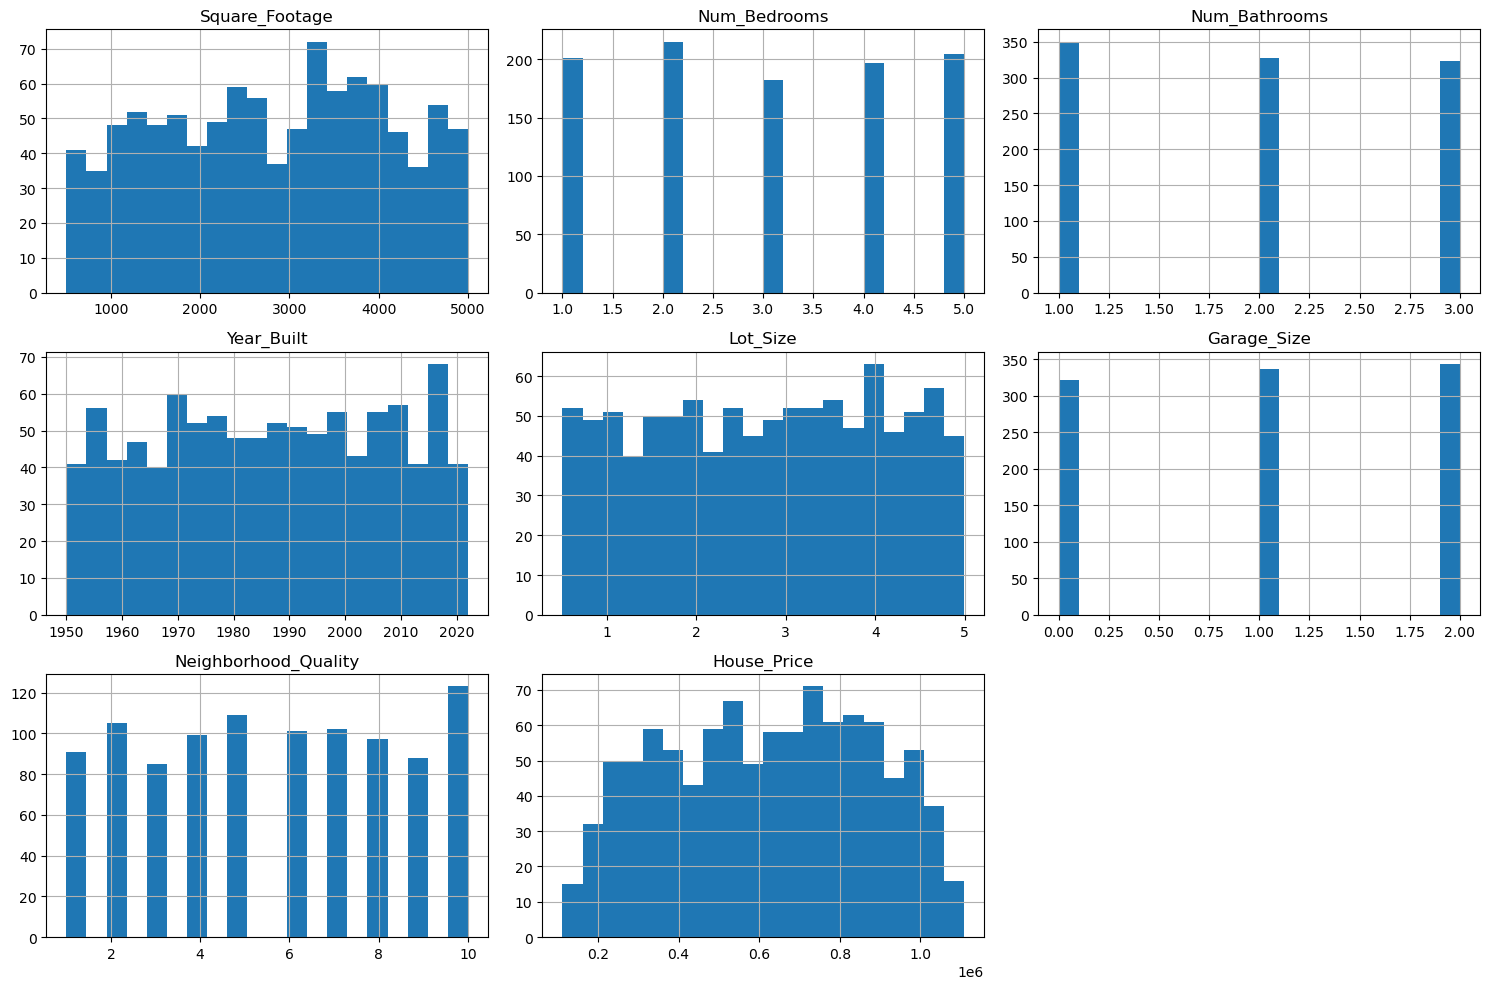

In [38]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

*Result*: Reveals skewness, outliers, and typical value ranges.

#### **Categorical Features**

Uses count plots to show the distribution of bedrooms, bathrooms, garage size, and neighborhood quality.

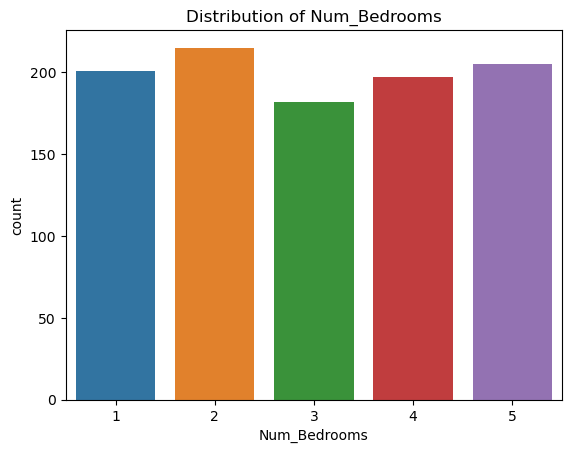

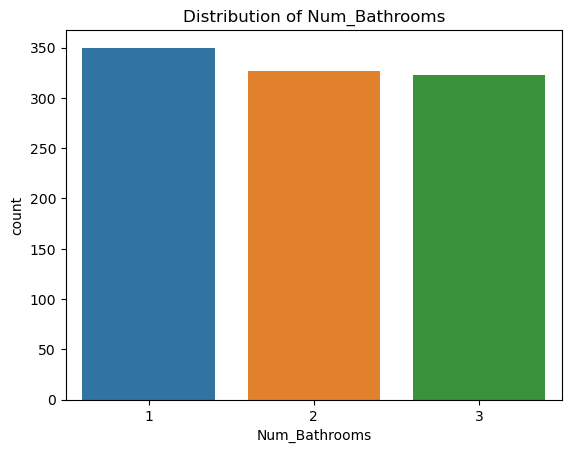

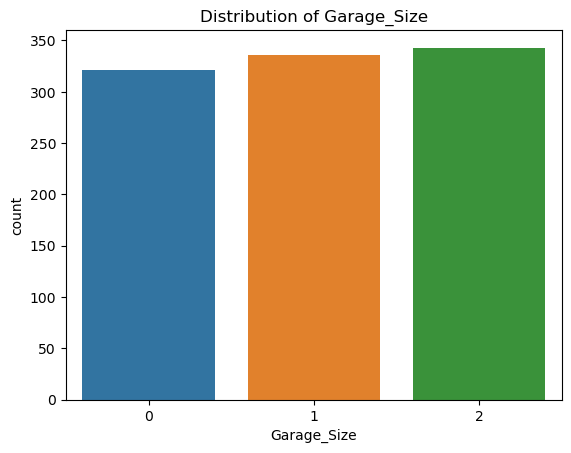

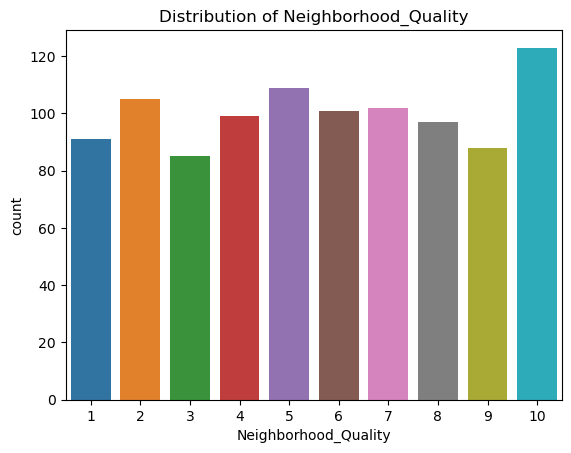

In [41]:
for col in ['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size', 'Neighborhood_Quality']:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    

*Result*: Reveals which categories are most common.

#### **Outlier Detection (Boxplots)**

Visualizes outliers in square footage, lot size, and house price using boxplots.

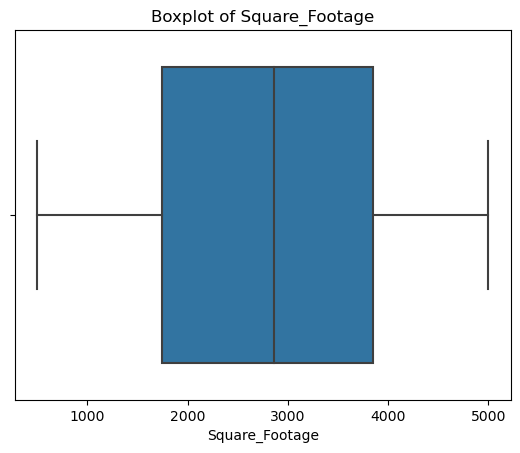

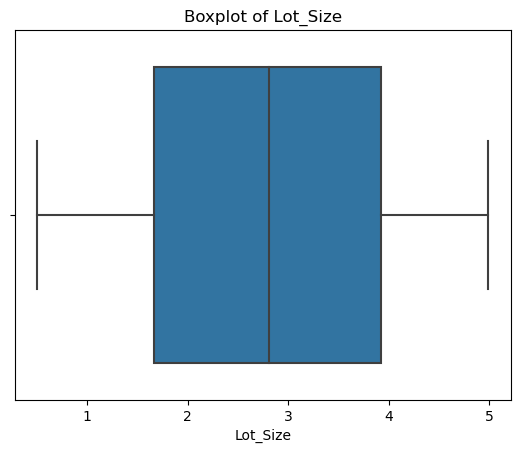

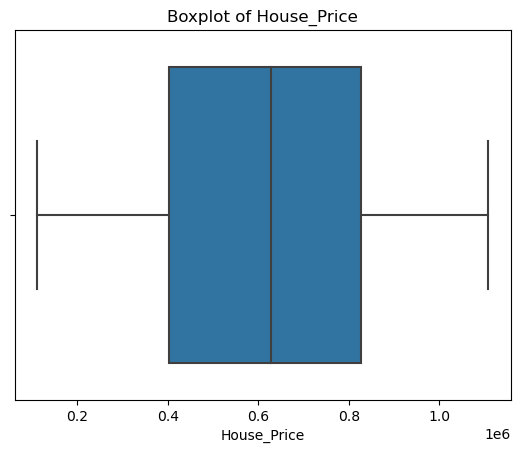

In [42]:
for col in ['Square_Footage', 'Lot_Size', 'House_Price']:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

*Result*: Identifies extreme values that may affect modeling.

#### **Correlation Analysis**

Display a heatmap of correlations between all numerical features.

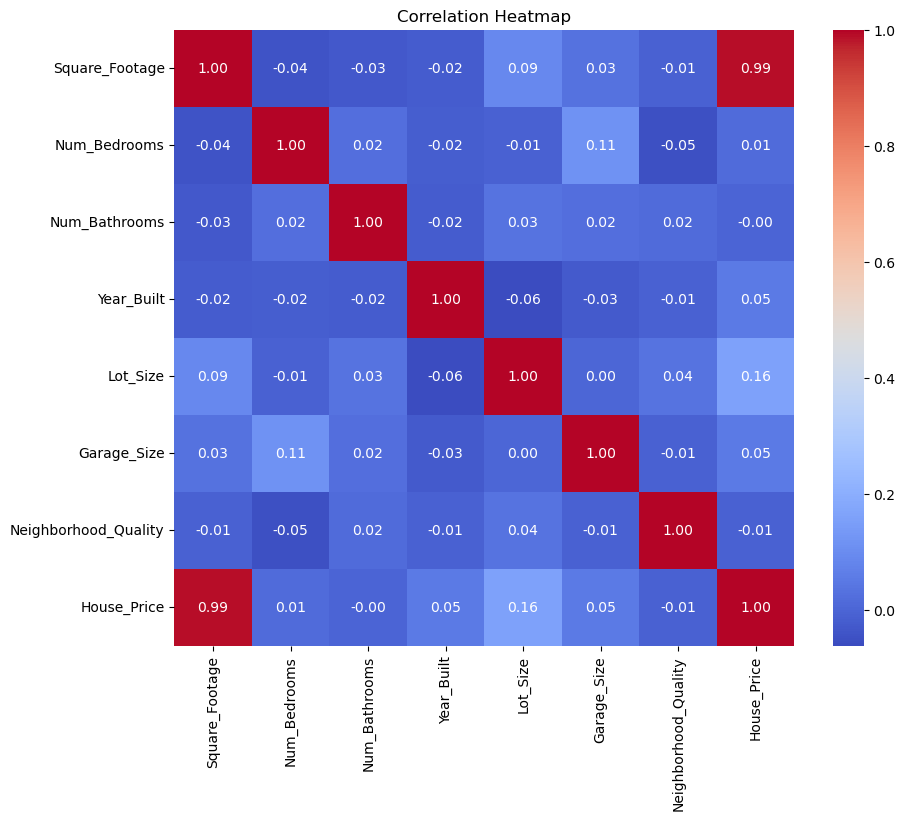

In [44]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*Result*: Identifies which feature are most strongly related to house price (e.g., square footage, neighborhood quality)

#### **Bivariate Analysis**

##### **Price vs. Numeric Features**

Plot house price against each numeric feature.

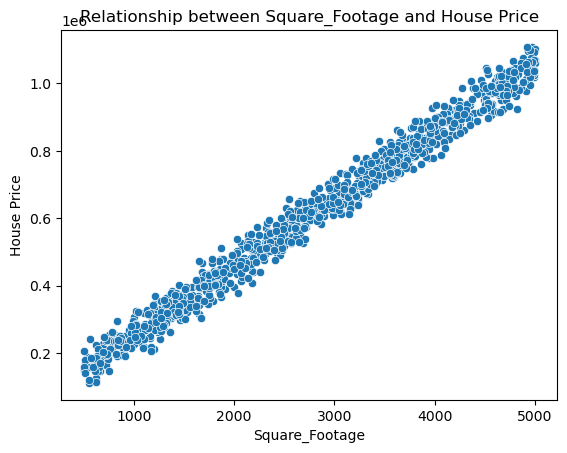

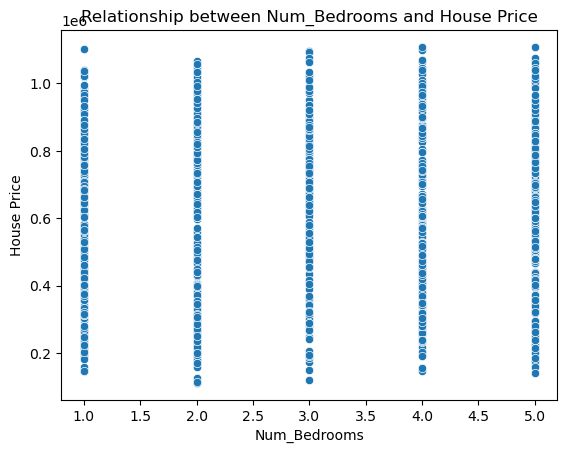

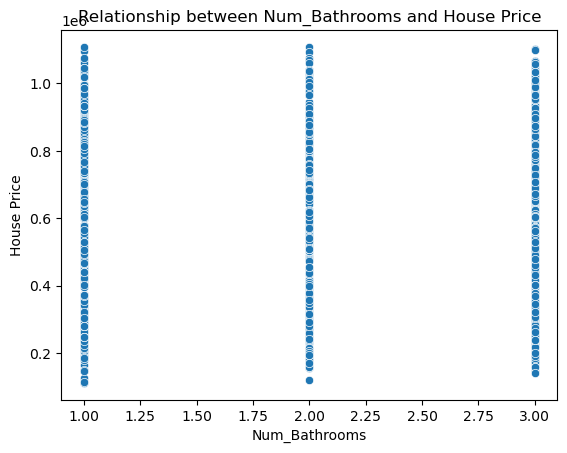

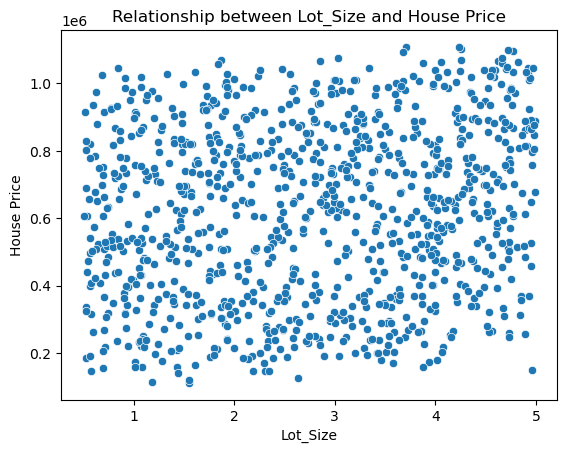

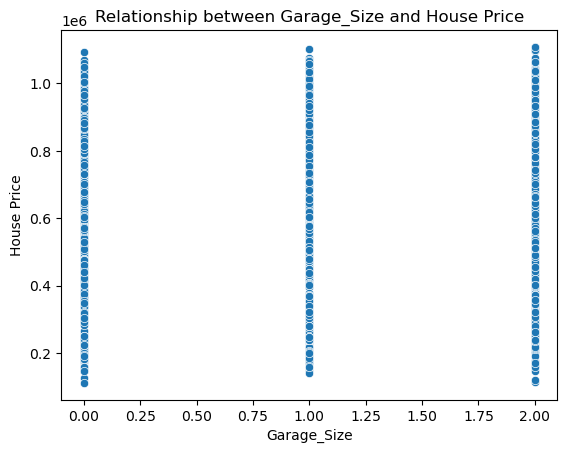

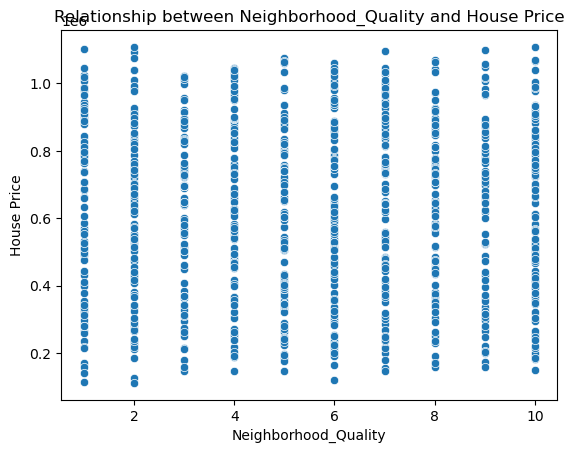

In [46]:
for col in ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']:
    sns.scatterplot(data=df, x=col, y='House_Price')
    plt.title(f'Relationship between {col} and House Price')
    plt.xlabel(col)
    plt.ylabel('House Price')
    plt.show()

*Result*: Visualizes linear or non-linear relationships.

##### **Price by Categorical Features**

Shows house price distribution for each category of bedrooms, bathrooms, garage_size, and neighborhood quality.

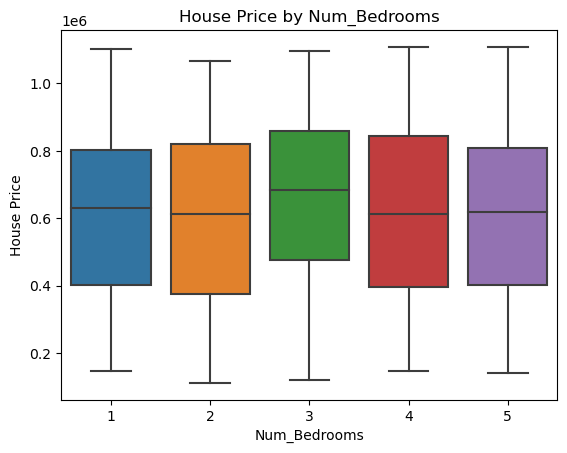

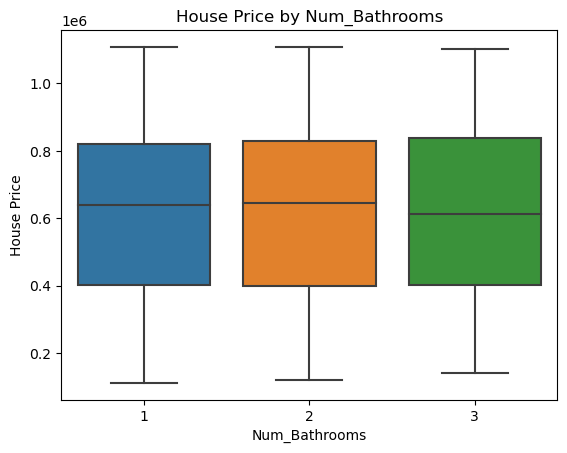

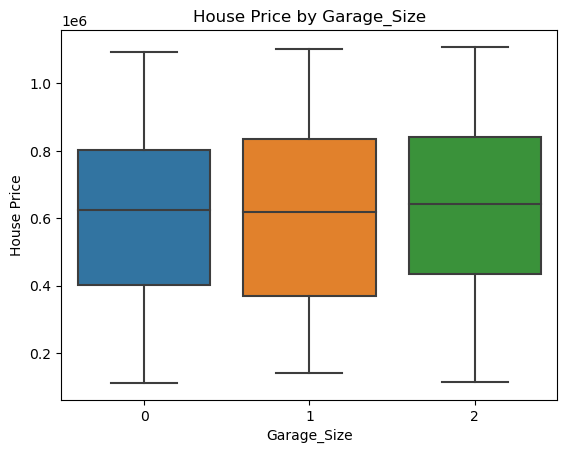

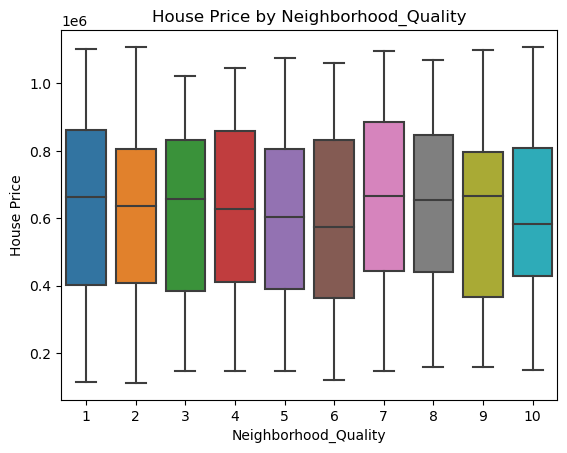

In [47]:
for col in ['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size', 'Neighborhood_Quality']:
    sns.boxplot(data=df, x=col, y='House_Price')
    plt.title(f'House Price by {col}')
    plt.xlabel(col)
    plt.ylabel('House Price')
    plt.show()

*Result*: Reveals how these features affect price.

#### **Year Built Analysis**

Plots a line chart to show house price trends over years.

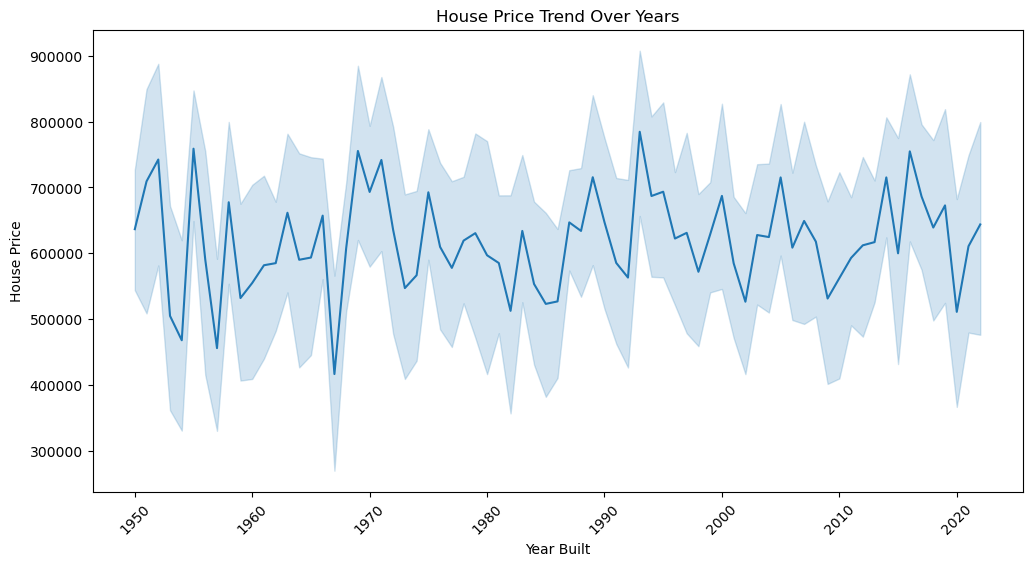

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year_Built', y='House_Price')
plt.title('House Price Trend Over Years')
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.xticks(rotation=45)
plt.show()

*Result*: Reveals trends over time (e.g., newer homes may be more expensive).

#### **Summary Statistics by Group**

Bar plots of average house price by number of bedrooms and by neighborhood quality.

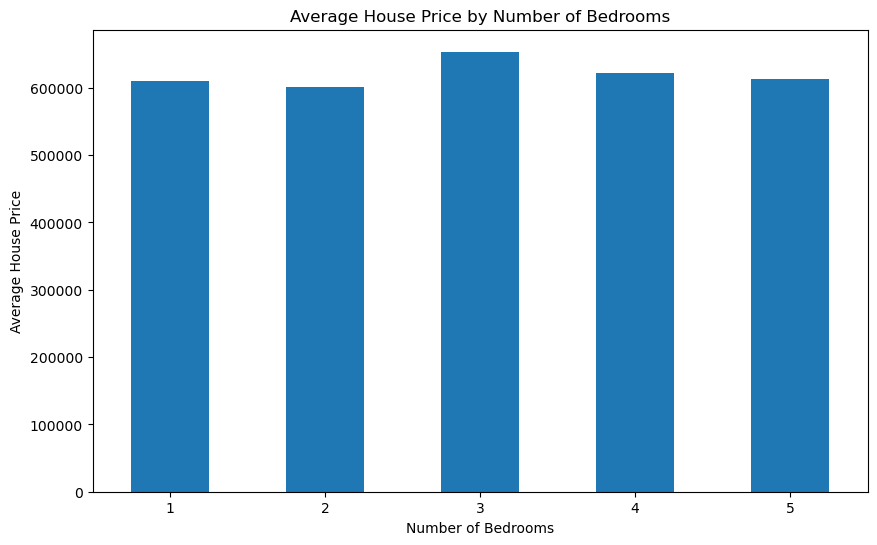

In [49]:
df.groupby('Num_Bedrooms')['House_Price'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average House Price')
plt.xticks(rotation=0)
plt.show()

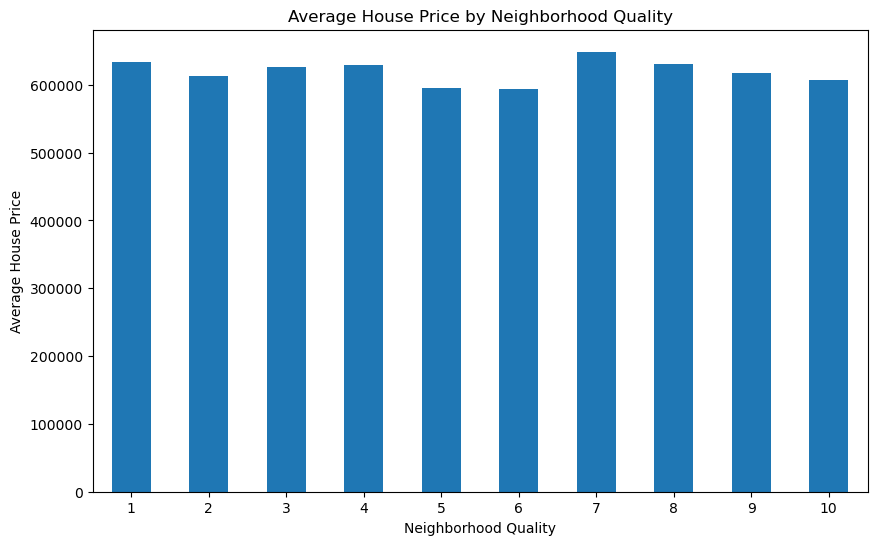

In [50]:
df.groupby('Neighborhood_Quality')['House_Price'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average House Price by Neighborhood Quality')
plt.xlabel('Neighborhood Quality')
plt.ylabel('Average House Price')
plt.xticks(rotation=0)
plt.show()

*Result*: Visualizes the impact of these features on price.

## **Machine Learning**

#### **Import Machine Learning Libraries**

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#### **Load and Prepare Data**

Separates features from target and splits data into training and test sets.

In [53]:
# Features and target variable
X = df.drop(columns=['House_Price'], axis=1)
y = df['House_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Feature Scaling**

Standardizes features to have mean 0 and variance 1. 

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Result*: Ensures fair comparison between features and improves model performance.

#### **Model Selection and Training**

Train Linear Regression, Ridge, Lasso, Random Forest, and Gradient Boosting models.

In [57]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

results_df = pd.DataFrame(results).T
print(results_df)

                                    MSE           MAE        R2
LinearRegression           1.014348e+08   8174.583600  0.998426
Ridge                      1.024810e+08   8241.586911  0.998410
Lasso                      1.014366e+08   8174.748374  0.998426
RandomForestRegressor      3.869873e+08  15824.115036  0.993996
GradientBoostingRegressor  2.250968e+08  12311.656892  0.996508


*Result*: Compares models using MSE, MAE, R². Random Forest and Gradient Boosting often outperform linear models on tabular data.

#### **Cross-Validation**

Evaluates each model using cross-validation on the training set.

In [58]:
for name, model in models.items():
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} CV Mean MSE: {-score.mean():.2f}")

LinearRegression CV Mean MSE: 95177250.18
Ridge CV Mean MSE: 95356814.06
Lasso CV Mean MSE: 95176698.54
RandomForestRegressor CV Mean MSE: 520680208.48
GradientBoostingRegressor CV Mean MSE: 277497309.64


*Result*: Provides a more robust estimate of model performance.

#### **Hyperparameter Tuning**

Searches for the best combination of hyperparameters.

In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score:", -grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 511882843.39392775


*Result*: Finds the optimal settings for the Random Forest model, improving performance.

#### **Evaluate the Best Model**

Evaluates the best model on the test set using MSE, MAE, and R².

In [60]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))

Test MSE: 378452507.9306923
Test MAE: 15860.539603399138
Test R2: 0.9941287741508585


*Result*: Shows how well the model generalizes to unseen data.

#### **Save the Model and Scaler**

Saves the trained model and scalar to disk. Allows you to reuse the model for future predictions without retraining.

In [61]:
import joblib

# Save the best mode
joblib.dump(best_model, 'best_housing_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#### **Load and Use the Model Later**

Loads the saved model and scalar, and makes a prediction on a sample. Demonstrates how to deploy the model for real-world use.

In [62]:
loaded_model = joblib.load('best_housing_price_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# example prediction
sample = X_test.iloc[[0]]
sample_scaled = loaded_scaler.transform(sample)
predicted_price = loaded_model.predict(sample_scaled)
print(f"Predicted house price: {predicted_price[0]:.2f}")

Predicted house price: 851957.55


## **Conclusion**

Through SQL queries, we explored the dataset's structure, trends, and outliers, gaining insights into how features like square footage, bedrooms, and neighborhood quality affect house prices. EDA confirmed these relationship visually and statistically, revealing strong correlations and the presence of outliers. In the machine learning phase, several regression models were compared, with Random Forest (after hyperparameter tuning) delivering the best predictive performance. The final model was saved for deployment, demonstrating a complete workflow from data exploration to model deployment.

<u>Key Findings</u>
* House price is most strongly influenced by square footage, lot size, and neighborhood quality.
* Random Forest regression provided the best results for this dataset.
* The workflow is robust and can be adapted for similar regression problems in real estate or other domains.